In [20]:
import pandas as pd
import re
import string
import gensim
from gensim import corpora
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
chn=pd.read_json('tokenized_chn.json', orient='records', lines=True)


In [3]:
chn

Title  \
0     covid treatment molnupiravir approved for impo...   
1     china allocates medical resources to ensure pe...   
2             domestic covid-19 drug effective in trial   
3              steps taken to ensure covid preparedness   
4     china ensures production of fever reducing med...   
...                                                 ...   
3506    wuhan wet market closes amid pneumonia outbreak   
3507     27 quarantined in wuhan due to viral pneumonia   
3508    viral pneumonia cases reported in central china   
3509         china's 1st homegrown hpv vaccine approved   
3510         man sentenced for illegal medical practice   

                                                   Link                Date  \
0     //www.chinadaily.com.cn/a/202212/30/WS63aee077... 2022-12-30 20:58:00   
1     //www.chinadaily.com.cn/a/202212/30/WS63ae92c7... 2022-12-30 15:26:00   
2     //www.chinadaily.com.cn/a/202212/30/WS63ae35c5... 2022-12-30 08:49:00   
3     //www.chinadaily.com.cn/a/202212/30/WS63ae1757... 2022-12-30 06:39:00   
4     //www.chinadaily.com.cn/a/202212/29/WS63ad91ac... 2022-12-29 21:09:00   
...                                                 ...                 ...   
3506  //www.chinadaily.com.cn/a/202001/01/WS5e0c6a49... 2020-01-01 17:45:00   
3507  //www.chinadaily.com.cn/a/202001/01/WS5e0bdf82... 2020-01-01 07:53:00   
3508  //www.chinadaily.com.cn/a/201912/31/WS5e0b1132... 2019-12-31 17:13:00   
3509  //www.chinadaily.com.cn/a/201912/31/WS5e0b0c55... 2019-12-31 16:52:00   
3510  //www.chinadaily.com.cn/a/201912/31/WS5e0a41be... 2019-12-31 02:28:00   

                                                Content Yearmonth  \
0     China's top drug regulator said on Friday that...   2022-12   
1     BEIJING -- China is actively allocating medica...   2022-12   
2     A domestic antiviral COVID-19 pill is as effec...   2022-12   
3     China's recent shifts in COVID-19 control stra...   2022-12   
4     The daily production volume of fever reduction...   2022-12   
...                                                 ...       ...   
3506  A Central China wet market known for seafood w...   2020-01   
3507  Twenty-seven people infected by viral pneumoni...   2020-01   
3508  WUHAN - The 27 pneumonia cases in Wuhan, capit...   2019-12   
3509  China's drug regulator has approved the countr...   2019-12   
3510  A researcher who claimed to have created the w...   2019-12   

                                                 Tokens  \
0     [china, top, drug, regulator, say, friday, gra...   
1     [beijing, china, actively, allocate, medical, ...   
2     [domestic, antiviral, covid, pill, effective, ...   
3     [china, recent, shift, covid, control, strateg...   
4     [daily, production, volume, fever, reduction, ...   
...                                                 ...   
3506  [central, china, wet, market, know, seafood, c...   
3507  [twenty, seven, people, infect, viral, pneumon...   
3508  [wuhan, pneumonia, case, wuhan, capital, centr...   
3509  [china, drug, regulator, approve, country, fir...   
3510  [researcher, claim, create, world, first, gene...   

                                           title_tokens  Topic  Topic_Prob  
0     [covid, treatment, molnupiravir, approve, impo...      4    0.586001  
1     [china, allocate, medical, resource, ensure, p...      2    0.618605  
2             [domestic, covid, drug, effective, trial]      0    0.474135  
3             [step, take, ensure, covid, preparedness]      0    0.649031  
4     [china, ensure, production, fever, reduce, med...      2    0.871414  
...                                                 ...    ...         ...  
3506  [wuhan, wet, market, close, amid, pneumonia, o...      9    0.749660  
3507         [quarantine, wuhan, due, viral, pneumonia]      2    0.671509  
3508   [viral, pneumonia, case, report, central, china]      0    0.308715  
3509          [china, homegrown, hpv, vaccine, approve]      6    0.672118  
3510   

In [4]:
highest_prob_topics=chn.groupby('Topic')['Topic_Prob'].idxmax()
highest_prob_topics_df=chn.loc[highest_prob_topics]
highest_prob_topics_df.reset_index()

index                                              Title  \
0   1619  china calls for tightened response as new covi...   
1   1993  east china's anhui clears areas with medium, h...   
2   1690  vaccines effective at reducing severe illness,...   
3    755  shanghai sees people from outside city return ...   
4   2919  chinese, japanese scientists collaborate on im...   
5    871  chinese mainland reports 345 new local confirm...   
6   1533  china's anti-covid-19 drug enters late-stage h...   
7   2363  inflated labs help pick up the pace of covid-1...   
8   1843  china sends 20 working groups to aid covid-19 ...   
9   1778  chinese vice-premier urges better protection o...   

                                                Link                Date  \
0  //www.chinadaily.com.cn/a/202110/24/WS617517d2... 2021-10-24 16:22:00   
1  //www.chinadaily.com.cn/a/202106/07/WS60bdb282... 2021-06-07 13:45:00   
2  //www.chinadaily.com.cn/a/202109/26/WS615018d5... 2021-09-26 14:53:00   
3  //www.chinadaily.com.cn/a/202205/25/WS628d8a6f... 2022-05-25 09:46:00   
4  //www.chinadaily.com.cn/a/202004/21/WS5e9e4533... 2020-04-21 08:58:00   
5  //www.chinadaily.com.cn/a/202205/07/WS6275e398... 2022-05-07 11:12:00   
6  //www.chinadaily.com.cn/a/202111/22/WS619b3d10... 2021-11-22 14:47:00   
7  //www.chinadaily.com.cn/a/202101/09/WS5ff9a4e5... 2021-01-09 20:43:00   
8  //www.chinadaily.com.cn/a/202108/05/WS610ba8d7... 2021-08-05 17:01:00   
9  //www.chinadaily.com.cn/a/202108/20/WS611f0cf4... 2021-08-20 10:01:00   

                                             Content Yearmonth  \
0  BEIJING -- A total of 11 provincial-level regi...   2021-10   
1  HEFEI -- The city of Lu'an in East China's Anh...   2021-06   
2  COVID-19 vaccines have a remarkable effect on ...   2021-09   
3  While some people are leaving Shanghai due to ...   2022-05   
4  LANZHOU -- Scientists from China and Japan are...   2020-04   
5  BEIJING - The Chinese mainland on Friday repor...   2022-05   
6  BEIJING -- A Chinese antiviral medicine for CO...   2021-11   
7  Portable inflated laboratories Huo-Yan Labs ha...   2021-01   
8  BEIJING - China's State Council joint COVID-19...   2021-08   
9  BEIJING - Chinese Vice-Premier Sun Chunlan on ...   2021-08   

                                              Tokens  \
0  [beijing, total, provincial, level, region, af...   
1  [hefei, city, lu, east, china, anhui, province...   
2  [covid, vaccine, remarkable, effect, prevent, ...   
3  [people, leave, shanghai, due, covid, epidemic...   
4  [lanzhou, scientists, china, japan, collaborat...   
5  [beijing, chinese, mainland, friday, report, l...   
6  [beijing, chinese, antiviral, medicine, covid,...   
7  [portable, inflated, laboratory, huo, yan, lab...   
8  [beijing, china, state, council, joint, covid,...   
9  [beijing, chinese, vice, premier, sun, chunlan...   

                                        title_tokens  Topic  Topic_Prob  
0  [china, call, tighten, response, new, covid, o...      0    0.909987  
1  [east, china, anhui, clear, area, medium, high...      1    0.909989  
2  [vaccine, effective, reduce, severe, illness, ...      2    0.918165  
3  [shanghai, see, people, outside, city, return,...      3    0.909985  
4  [chinese, japanese, scientist, collaborate, im...      4    0.899982  
5  [chinese, mainland, report, new, local, confir...      5    0.909997  
6  [china, anti, covid, drug, enter, late, stage,...      6    0.909994  
7  [inflated, lab, help, pick, pace, covid, testi...      7    0.918162  
8  [china, send, work, group, aid, covid, prevent...      8    0.909985  
9  [chinese, vice, premier, urge, well, protectio...      9    0.909991

In [86]:
pd.reset_option('display.max_colwidth', None)
highest_prob_topics_df.iloc[6,0]

"china's anti-covid-19 drug enters late-stage human trial"

In [5]:

chn['Topic']+=1
chn

Title  \
0     covid treatment molnupiravir approved for impo...   
1     china allocates medical resources to ensure pe...   
2             domestic covid-19 drug effective in trial   
3              steps taken to ensure covid preparedness   
4     china ensures production of fever reducing med...   
...                                                 ...   
3506    wuhan wet market closes amid pneumonia outbreak   
3507     27 quarantined in wuhan due to viral pneumonia   
3508    viral pneumonia cases reported in central china   
3509         china's 1st homegrown hpv vaccine approved   
3510         man sentenced for illegal medical practice   

                                                   Link                Date  \
0     //www.chinadaily.com.cn/a/202212/30/WS63aee077... 2022-12-30 20:58:00   
1     //www.chinadaily.com.cn/a/202212/30/WS63ae92c7... 2022-12-30 15:26:00   
2     //www.chinadaily.com.cn/a/202212/30/WS63ae35c5... 2022-12-30 08:49:00   
3     //www.chinadaily.com.cn/a/202212/30/WS63ae1757... 2022-12-30 06:39:00   
4     //www.chinadaily.com.cn/a/202212/29/WS63ad91ac... 2022-12-29 21:09:00   
...                                                 ...                 ...   
3506  //www.chinadaily.com.cn/a/202001/01/WS5e0c6a49... 2020-01-01 17:45:00   
3507  //www.chinadaily.com.cn/a/202001/01/WS5e0bdf82... 2020-01-01 07:53:00   
3508  //www.chinadaily.com.cn/a/201912/31/WS5e0b1132... 2019-12-31 17:13:00   
3509  //www.chinadaily.com.cn/a/201912/31/WS5e0b0c55... 2019-12-31 16:52:00   
3510  //www.chinadaily.com.cn/a/201912/31/WS5e0a41be... 2019-12-31 02:28:00   

                                                Content Yearmonth  \
0     China's top drug regulator said on Friday that...   2022-12   
1     BEIJING -- China is actively allocating medica...   2022-12   
2     A domestic antiviral COVID-19 pill is as effec...   2022-12   
3     China's recent shifts in COVID-19 control stra...   2022-12   
4     The daily production volume of fever reduction...   2022-12   
...                                                 ...       ...   
3506  A Central China wet market known for seafood w...   2020-01   
3507  Twenty-seven people infected by viral pneumoni...   2020-01   
3508  WUHAN - The 27 pneumonia cases in Wuhan, capit...   2019-12   
3509  China's drug regulator has approved the countr...   2019-12   
3510  A researcher who claimed to have created the w...   2019-12   

                                                 Tokens  \
0     [china, top, drug, regulator, say, friday, gra...   
1     [beijing, china, actively, allocate, medical, ...   
2     [domestic, antiviral, covid, pill, effective, ...   
3     [china, recent, shift, covid, control, strateg...   
4     [daily, production, volume, fever, reduction, ...   
...                                                 ...   
3506  [central, china, wet, market, know, seafood, c...   
3507  [twenty, seven, people, infect, viral, pneumon...   
3508  [wuhan, pneumonia, case, wuhan, capital, centr...   
3509  [china, drug, regulator, approve, country, fir...   
3510  [researcher, claim, create, world, first, gene...   

                                           title_tokens  Topic  Topic_Prob  
0     [covid, treatment, molnupiravir, approve, impo...      5    0.586001  
1     [china, allocate, medical, resource, ensure, p...      3    0.618605  
2             [domestic, covid, drug, effective, trial]      1    0.474135  
3             [step, take, ensure, covid, preparedness]      1    0.649031  
4     [china, ensure, production, fever, reduce, med...      3    0.871414  
...                                                 ...    ...         ...  
3506  [wuhan, wet, market, close, amid, pneumonia, o...     10    0.749660  
3507         [quarantine, wuhan, due, viral, pneumonia]      3    0.671509  
3508   [viral, pneumonia, case, report, central, china]      1    0.308715  
3509          [china, homegrown, hpv, vaccine, approve]      7    0.672118  
3510   

In [6]:
chn['Topic'].value_counts()

Topic
6     826
1     359
2     356
9     349
3     325
4     316
10    295
8     280
7     215
5     190
Name: count, dtype: int64

In [ ]:
#separate the topics
chn_topic={}
for topic, group in chn.groupby('Topic'):
    chn_topic[topic]=group
for topic, df in chn_topic.items():
    print(f"DataFrame for Topic {topic}:")
    print(df)
    print("-" * 40)

DataFrame for Topic 1:
                                                  Title  \
2             domestic covid-19 drug effective in trial   
3              steps taken to ensure covid preparedness   
5                           q&a on covid-19 reinfection   
31    china has 13 covid vaccines available for seco...   
36           cities brace for surge in covid infections   
...                                                 ...   
3437  vice-premier calls for strong measures to curb...   
3442  bats likely origin of new coronavirus, says study   
3457  strictest measures enacted to contain viral pn...   
3482           17 new cases in pneumonia viral outbreak   
3508    viral pneumonia cases reported in central china   

                                                   Link                Date  \
2     //www.chinadaily.com.cn/a/202212/30/WS63ae35c5... 2022-12-30 08:49:00   
3     //www.chinadaily.com.cn/a/202212/30/WS63ae1757... 2022-12-30 06:39:00   
5     //www.chinadaily.com.cn/a

In [15]:
topic1=chn_topic[1]

In [17]:
topic1

Title  \
2             domestic covid-19 drug effective in trial   
3              steps taken to ensure covid preparedness   
5                           q&a on covid-19 reinfection   
31    china has 13 covid vaccines available for seco...   
36           cities brace for surge in covid infections   
...                                                 ...   
3437  vice-premier calls for strong measures to curb...   
3442  bats likely origin of new coronavirus, says study   
3457  strictest measures enacted to contain viral pn...   
3482           17 new cases in pneumonia viral outbreak   
3508    viral pneumonia cases reported in central china   

                                                   Link                Date  \
2     //www.chinadaily.com.cn/a/202212/30/WS63ae35c5... 2022-12-30 08:49:00   
3     //www.chinadaily.com.cn/a/202212/30/WS63ae1757... 2022-12-30 06:39:00   
5     //www.chinadaily.com.cn/a/202212/29/WS63ad2cd3... 2022-12-29 13:59:00   
31    //www.chinadaily.com.cn/a/202212/26/WS63a9689d... 2022-12-26 17:25:00   
36    //www.chinadaily.com.cn/a/202212/26/WS63a8e07c... 2022-12-26 07:44:00   
...                                                 ...                 ...   
3437  //www.chinadaily.com.cn/a/202001/23/WS5e28752a... 2020-01-23 00:15:00   
3442  //www.chinadaily.com.cn/a/202001/22/WS5e27e272... 2020-01-22 13:49:00   
3457  //www.chinadaily.com.cn/a/202001/22/WS5e27625a... 2020-01-22 04:43:00   
3482  //www.chinadaily.com.cn/a/202001/20/WS5e24eb08... 2020-01-20 07:49:00   
3508  //www.chinadaily.com.cn/a/201912/31/WS5e0b1132... 2019-12-31 17:13:00   

                                                Content Yearmonth  \
2     A domestic antiviral COVID-19 pill is as effec...   2022-12   
3     China's recent shifts in COVID-19 control stra...   2022-12   
5     The more virulent Delta strain of COVID-19 is ...   2022-12   
31    BEIJING -- A total of 13 types of COVID-19 vac...   2022-12   
36    Cities nationwide are bracing for peaks of COV...   2022-12   
...                                                 ...       ...   
3437  Vice-Premier Sun Chunlan on Wednesday called f...   2020-01   
3442  The new coronavirus in the ongoing outbreak in...   2020-01   
3457  Chinese health authorities are adopting the st...   2020-01   
3482  Number of known infections rises to 62, accord...   2020-01   
3508  WUHAN - The 27 pneumonia cases in Wuhan, capit...   2019-12   

                                                 Tokens  \
2     [domestic, antiviral, covid, pill, effective, ...   
3     [china, recent, shift, covid, control, strateg...   
5     [virulent, delta, strain, covid, currently, ci...   
31    [beijing, total, type, covid, vaccine, approve...   
36    [city, nationwide, bracing, peak, covid, infec...   
...                                                 ...   
3437  [vice, premier, sun, chunlan, wednesday, call,...   
3442  [new, coronavirus, ongoing, outbreak, wuhan, h...   
3457  [chinese, health, authority, adopt, strictest,...   
3482  [number, know, infection, rise, accord, wuhan,...   
3508  [wuhan, pneumonia, case, wuhan, capital, centr...   

                                           title_tokens  Topic  
2             [domestic, covid, drug, effective, trial]      1  
3             [step, take, ensure, covid, preparedness]      1  
5                               [q, covid, reinfection]      1  
31    [china, covid, vaccine, available, second, boo...      1  
36               [city, brace, surge, covid, infection]      1  
...                                                 ...    ...  
3437  [vice, premier, call, strong, measure, curb, c...      1  
3442  [bat, likely, origin, new, coronavirus, say, s...      1  
3457  [strictest, measure, enact, contain, viral, pn...      1  
3482            [new, case, pneumonia, viral, outbreak]      1  
3508   [viral, pneumonia, case, report, central, china]      1  

[359 rows x 8 columns]

In [36]:
topic1=chn_topic[1]
topic1_dict=corpora.Dictionary(topic1['Tokens'])
topic1_corpus=[topic1_dict.doc2bow(text) for text in topic1['Tokens']]
topic1_lda=gensim.models.ldamodel.LdaModel(topic1_corpus, 
                                           num_topics=5, 
                                           id2word=topic1_dict,
                                           random_state=100,
                                           passes=10,
                                           alpha=0.1, 
                                           eta=0.1)

# Display the topics
topics1=topic1_lda.print_topics(num_words=10)
for topic in topics1:
    print(topic)

(0, '0.017*"say" + 0.010*"covid" + 0.010*"people" + 0.009*"case" + 0.008*"control" + 0.008*"infection" + 0.007*"disease" + 0.007*"hospital" + 0.006*"patient" + 0.006*"city"')
(1, '0.023*"say" + 0.012*"city" + 0.012*"control" + 0.010*"covid" + 0.009*"case" + 0.008*"measure" + 0.008*"local" + 0.008*"virus" + 0.007*"health" + 0.007*"risk"')
(2, '0.040*"vaccine" + 0.021*"say" + 0.015*"covid" + 0.014*"dose" + 0.011*"china" + 0.008*"chinese" + 0.007*"health" + 0.007*"people" + 0.007*"study" + 0.007*"million"')
(3, '0.030*"covid" + 0.029*"case" + 0.020*"report" + 0.019*"new" + 0.018*"china" + 0.013*"coronavirus" + 0.011*"beijing" + 0.011*"say" + 0.010*"chinese" + 0.009*"infection"')
(4, '0.027*"say" + 0.019*"china" + 0.014*"covid" + 0.012*"health" + 0.010*"control" + 0.009*"people" + 0.008*"country" + 0.008*"disease" + 0.008*"vaccination" + 0.006*"virus"')


In [ ]:
#convert to words for the emotional analysis
topic1_words=[topic1_dict[id] for id in topic1_dict.keys()]

In [7]:
from collections import defaultdict


In [8]:
nrc_lexicon = pd.read_csv('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', 
                          names=["word", "emotion", "association"], 
                          sep="\t")

In [30]:
emotion_dict = defaultdict(lambda: defaultdict(int))
for i, row in nrc_lexicon.iterrows():
    emotion_dict[row['word']][row['emotion']] = int(row['association'])
emotion_scores = defaultdict(int)
for word in topic1_words:
    for emotion in emotion_dict[word]:
        emotion_scores[emotion] += emotion_dict[word][emotion]

# Display emotion scores
print(dict(emotion_scores))
topic1_emo=pd.DataFrame(list(emotion_scores.items()),columns=['Emotions','Score'])
plt.figure(figsize=(10,6))
sns.barplot(x='Emotions',y='Score', data=topic1_emo,palette="muted")
plt.title('Emotion Score For Topic 1', fontsize=16)
plt.xlabel('Emotions',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.show()


{'anger': 146, 'anticipation': 222, 'disgust': 101, 'fear': 239, 'joy': 134, 'negative': 414, 'positive': 582, 'sadness': 167, 'surprise': 99, 'trust': 339}


In [32]:
#visualize the emotions
topic1_emo=pd.DataFrame(list(emotion_scores.items()),columns=['Emotions','Score'])
topic1_emo

Emotions  Score
0         anger    146
1  anticipation    222
2       disgust    101
3          fear    239
4           joy    134
5      negative    414
6      positive    582
7       sadness    167
8      surprise     99
9         trust    339

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_42090/96018005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions',y='Score', data=topic1_emo,palette="muted")


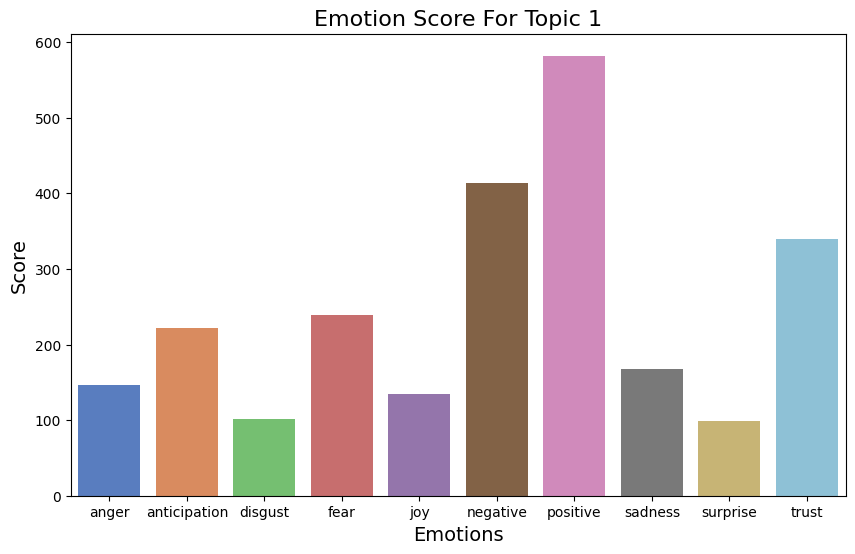

In [35]:


plt.figure(figsize=(10,6))
sns.barplot(x='Emotions',y='Score', data=topic1_emo,palette="muted")
plt.title('Emotion Score For Topic 1', fontsize=16)
plt.xlabel('Emotions',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.show()

{'anger': 88, 'anticipation': 139, 'disgust': 53, 'fear': 148, 'joy': 84, 'negative': 247, 'positive': 334, 'sadness': 99, 'surprise': 49, 'trust': 190}


/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_53220/2314920021.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions',y='Score', data=title_emo,palette="muted")


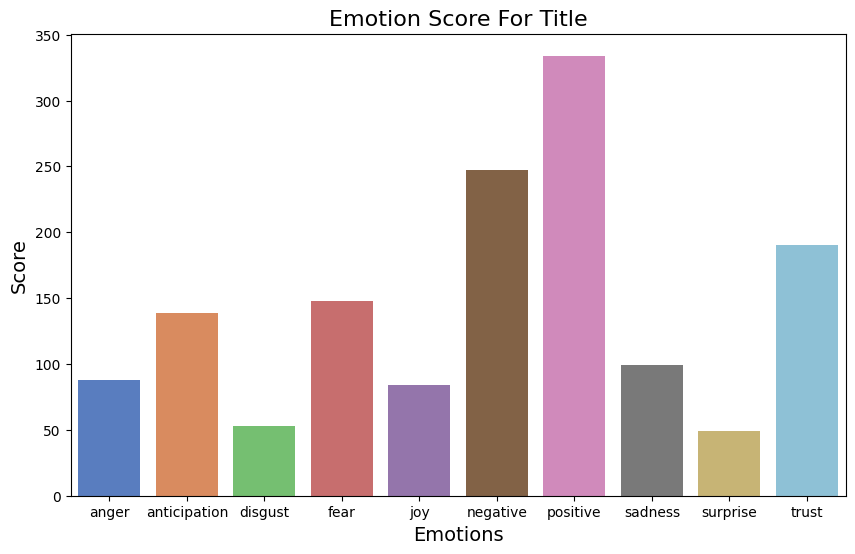

In [11]:
# for the title
title_dict=corpora.Dictionary(chn['title_tokens'])
title_words = [title_dict[id] for id in title_dict.keys()]

emotion_dict=defaultdict(lambda: defaultdict(int))
for i, row in nrc_lexicon.iterrows():
    emotion_dict[row['word']][row['emotion']] = int(row['association'])
emotion_scores=defaultdict(int)
for word in title_words:
    for emotion in emotion_dict[word]:
        emotion_scores[emotion]+=emotion_dict[word][emotion]
print(dict(emotion_scores))

title_emo=pd.DataFrame(list(emotion_scores.items()),columns=['Emotions','Score'])

plt.figure(figsize=(10,6))
sns.barplot(x='Emotions',y='Score', data=title_emo,palette="muted")
plt.title('Emotion Score For Title', fontsize=16)
plt.xlabel('Emotions',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.show()


In [ ]:

def calculate_emotion_scores(title_tokens):
    emotion_scores=defaultdict(int)
    for token in title_tokens:
        if token in emotion_dict:
            for emotion in emotion_dict[token]:
                emotion_scores[emotion] += emotion_dict[token][emotion]
    return emotion_scores

chn['emotion_scores']=chn['title_tokens'].apply(calculate_emotion_scores)
chn['Year']=chn['Yearmonth'].astype(str).str[:4].astype(int)

yearly_emotions=defaultdict(lambda: defaultdict(int))

for index, row in chn.iterrows():
    year=row['Year']
    emotions=row['emotion_scores']
    for emotion, score in emotions.items():
        yearly_emotions[year][emotion] += score

yearly_emotions_df=pd.DataFrame(yearly_emotions).T.reset_index().rename(columns={'index': 'Year'})
yearly_emotions_df=yearly_emotions_df.melt(id_vars=['Year'], var_name='Emotion', value_name='Score')

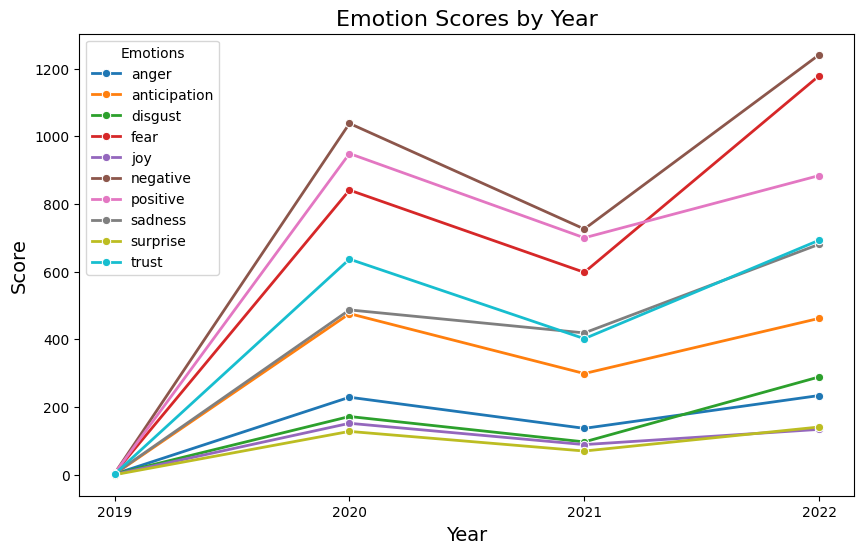

In [13]:
# lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Score', hue='Emotion', data=yearly_emotions_df, marker='o', linewidth=2)
plt.xticks(yearly_emotions_df['Year'].unique())
plt.title('Emotion Scores by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Emotions')
plt.show()

In [21]:
# create the pipepline to apply to all topic dataframe
class TextAnalysisPipeline:
    def __init__(self, topic_dataframes, n_topics=5, nrc_lexicon_file='NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'):
        self.topic_dataframes=topic_dataframes
        self.n_topics=n_topics
        
        # Load and prepare the NRC Lexicon
        self.nrc_lexicon=pd.read_csv(nrc_lexicon_file, names=["word", "emotion", "association"], sep="\t")
        self.emotion_dict=defaultdict(lambda: defaultdict(int))
        for i, row in self.nrc_lexicon.iterrows():
            self.emotion_dict[row['word']][row['emotion']] = int(row['association'])
        
       # for different topics
        self.topic_models={}
        self.topic_dicts={}
        self.topic_corpora={}

        # Prepare topic modeling components
        for idx, topic_data in enumerate(self.topic_dataframes):
            topic_dict=corpora.Dictionary(topic_data['Tokens'])
            topic_corpus=[topic_dict.doc2bow(text) for text in topic_data['Tokens']]
            topic_lda=gensim.models.ldamodel.LdaModel(topic_corpus, 
                                                        num_topics=self.n_topics, 
                                                        id2word=topic_dict,
                                                        random_state=100,
                                                        passes=10,
                                                        alpha=0.1, 
                                                        eta=0.1)
            # Store the model and related data
            self.topic_dicts[idx]=topic_dict
            self.topic_corpora[idx]=topic_corpus
            self.topic_models[idx]=topic_lda
        
    # show the result of the topic modeling
    def display_topics(self, topic_idx, num_words=15):
        if topic_idx in self.topic_models:
            topics=self.topic_models[topic_idx].print_topics(num_words=num_words)
            print(f"Topics for topic index {topic_idx+1}:")
            for topic in topics:
                print(topic)
        else:
            print(f"No model found for topic index {topic_idx}.")

    #the score for the emotions
    def emotional_analysis(self,topic_idx):
        if topic_idx in self.topic_dicts:
            topic_words=[self.topic_dicts[topic_idx][id] for id in self.topic_dicts[topic_idx].keys()]
            emotion_scores=defaultdict(int)
            for word in topic_words:
                for emotion in self.emotion_dict[word]:
                    emotion_scores[emotion]+=self.emotion_dict[word][emotion]

            # Display emotion scores as a bar plot
            emotion_df=pd.DataFrame(list(emotion_scores.items()), columns=['Emotions', 'Score'])
            plt.figure(figsize=(10,6))
            sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")
            plt.title(f'Emotion Score for Topic {topic_idx+1}', fontsize=16)
            plt.xlabel('Emotions', fontsize=14)
            plt.ylabel('Score', fontsize=14)
            plt.show()

            return emotion_scores
        else:
            print(f"No data found for topic index {topic_idx}.")
    
    # words frequency
    def word_frequency_analysis(self, topic_idx):
        if topic_idx in self.topic_dicts:
            word_freq=self.topic_dicts[topic_idx].dfs
            freq_list=[(self.topic_dicts[topic_idx][id], freq) for id, freq in word_freq.items()]
            freq_df=pd.DataFrame(freq_list, columns=['Word', 'Frequency'])
            freq_df_sort=freq_df.sort_values(by='Frequency', ascending=False)
            freq_top20=freq_df_sort.head(20)
            
            # Plot top 20 most frequent words
            plt.figure(figsize=(10, 6))
            plt.bar(freq_top20['Word'], freq_top20['Frequency'], color='skyblue')
            plt.xlabel("Words in Top 20 List")
            plt.ylabel("Frequency")
            plt.title(f"Top 20 Most Frequent Words in Topic {topic_idx+1}")
            plt.xticks(rotation=45)
            plt.show()

            return freq_df_sort
        else:
            print(f"No data found for topic index {topic_idx}.")
    
    def generate_wordcloud(self, topic_idx):
        if topic_idx in self.topic_dicts:
            word_freq=self.topic_dicts[topic_idx].dfs
            freq_dict={self.topic_dicts[topic_idx][id]: freq for id, freq in word_freq.items()}
            
            # Generate the word cloud
            wordcloud=WordCloud(
                width=800,
                height=400,
                background_color='white',
                colormap='viridis'
            ).generate_from_frequencies(freq_dict)
            
            # Display the word cloud
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")
            plt.title(f"Word Cloud for Topic {topic_idx+1}")
            plt.show()
        else:
            print(f"No data found for topic index {topic_idx}.")

Topics for topic index 1:
(0, '0.017*"say" + 0.010*"covid" + 0.010*"people" + 0.009*"case" + 0.008*"control" + 0.008*"infection" + 0.007*"disease" + 0.007*"hospital" + 0.006*"patient" + 0.006*"city" + 0.006*"epidemic" + 0.006*"shanghai" + 0.006*"report" + 0.006*"test" + 0.006*"outbreak"')
(1, '0.023*"say" + 0.012*"city" + 0.012*"control" + 0.010*"covid" + 0.009*"case" + 0.008*"measure" + 0.008*"local" + 0.008*"virus" + 0.007*"health" + 0.007*"risk" + 0.007*"prevention" + 0.007*"patient" + 0.007*"province" + 0.006*"also" + 0.006*"test"')
(2, '0.040*"vaccine" + 0.021*"say" + 0.015*"covid" + 0.014*"dose" + 0.011*"china" + 0.008*"chinese" + 0.007*"health" + 0.007*"people" + 0.007*"study" + 0.007*"million" + 0.007*"use" + 0.007*"trial" + 0.006*"virus" + 0.006*"show" + 0.006*"variant"')
(3, '0.030*"covid" + 0.029*"case" + 0.020*"report" + 0.019*"new" + 0.018*"china" + 0.013*"coronavirus" + 0.011*"beijing" + 0.011*"say" + 0.010*"chinese" + 0.009*"infection" + 0.009*"confirm" + 0.009*"mainland

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_53220/1740465052.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


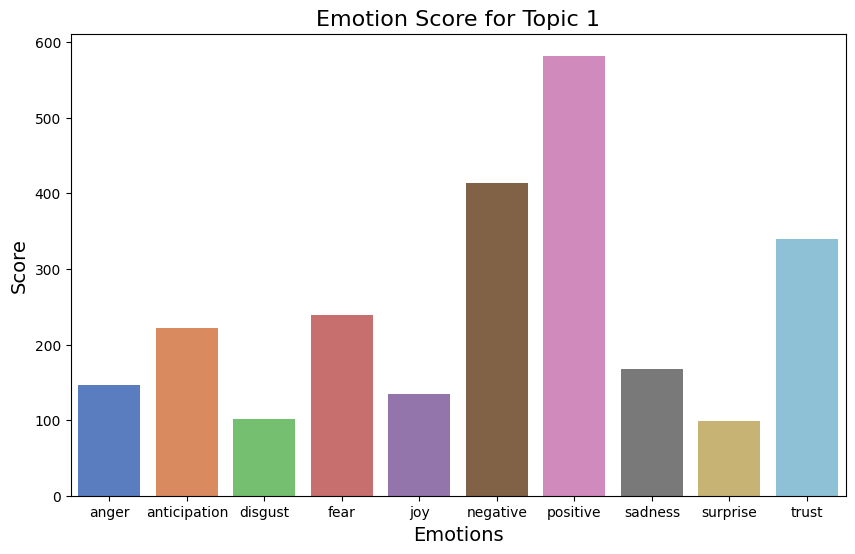

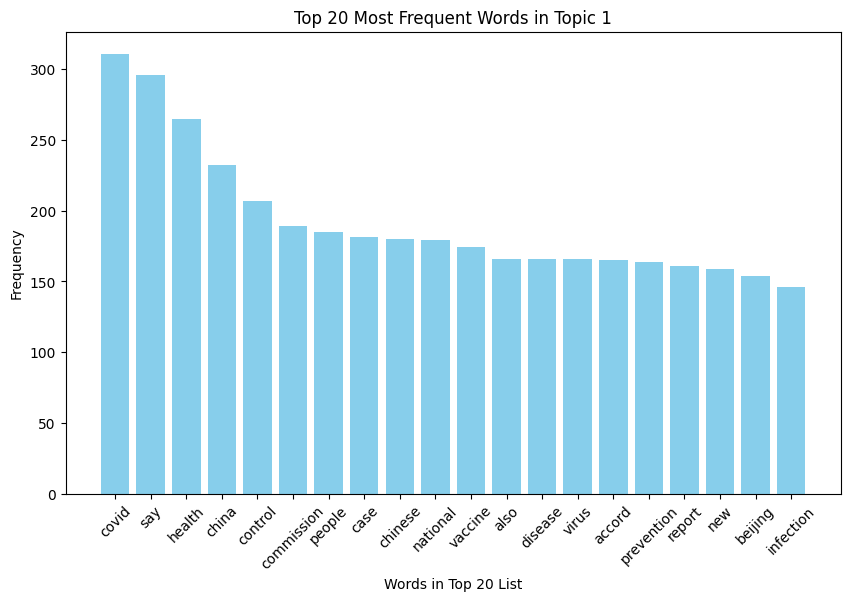

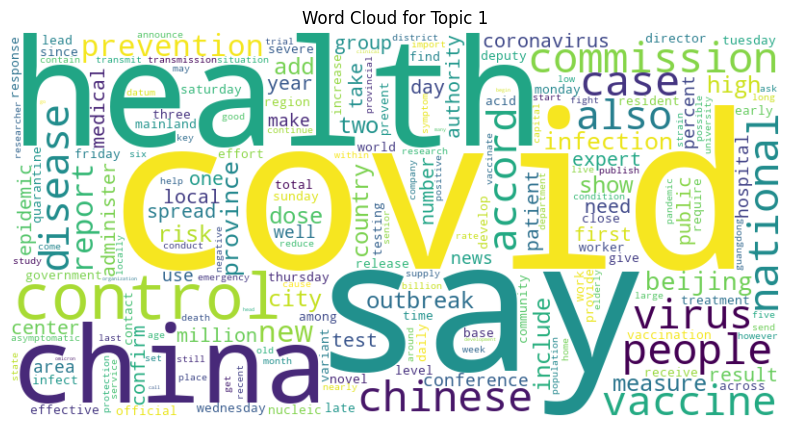



Topics for topic index 2:
(0, '0.015*"say" + 0.012*"patient" + 0.011*"hospital" + 0.008*"airport" + 0.007*"medical" + 0.006*"flight" + 0.006*"worker" + 0.005*"online" + 0.005*"china" + 0.005*"treatment" + 0.005*"also" + 0.005*"year" + 0.005*"drug" + 0.005*"medicine" + 0.005*"case"')
(1, '0.018*"patient" + 0.018*"hospital" + 0.016*"say" + 0.016*"case" + 0.016*"covid" + 0.013*"city" + 0.013*"report" + 0.012*"health" + 0.009*"province" + 0.009*"commission" + 0.008*"test" + 0.008*"medical" + 0.006*"monday" + 0.006*"discharge" + 0.006*"confirm"')
(2, '0.029*"say" + 0.014*"case" + 0.010*"virus" + 0.010*"city" + 0.009*"covid" + 0.009*"health" + 0.009*"infection" + 0.008*"people" + 0.008*"patient" + 0.008*"report" + 0.007*"control" + 0.007*"new" + 0.006*"province" + 0.006*"test" + 0.006*"commission"')
(3, '0.017*"say" + 0.016*"test" + 0.013*"testing" + 0.012*"medical" + 0.011*"covid" + 0.010*"people" + 0.009*"hospital" + 0.008*"nucleic" + 0.008*"fever" + 0.008*"acid" + 0.007*"city" + 0.007*"

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_53220/1740465052.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


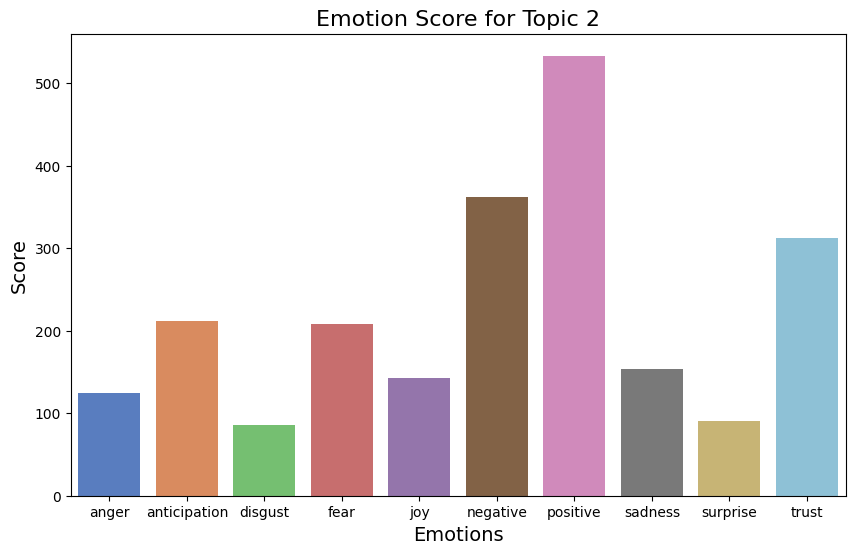

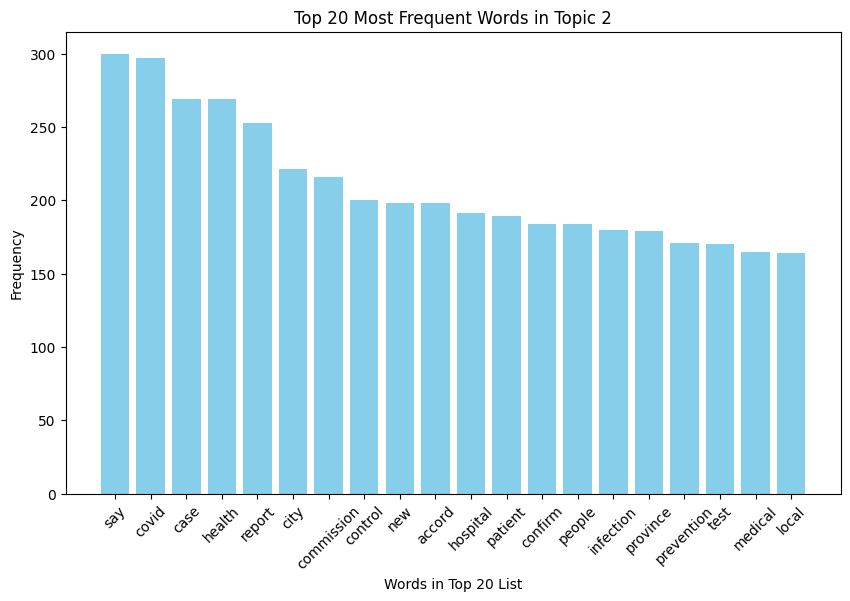

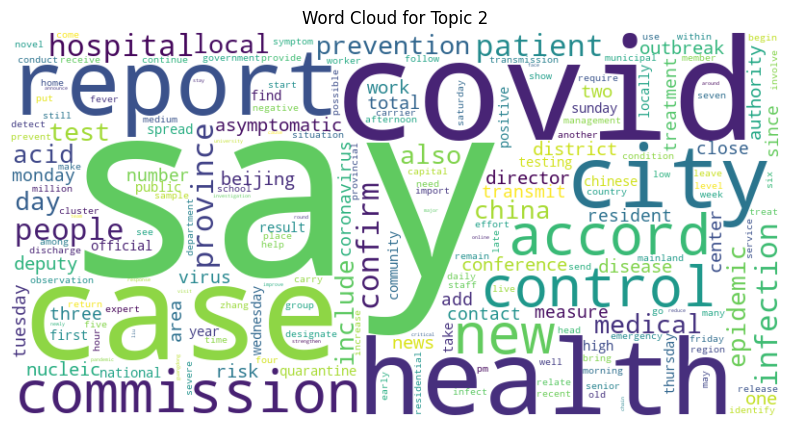



Topics for topic index 3:
(0, '0.024*"say" + 0.013*"case" + 0.011*"china" + 0.010*"covid" + 0.010*"health" + 0.009*"disease" + 0.008*"people" + 0.008*"hospital" + 0.008*"medical" + 0.007*"patient" + 0.007*"also" + 0.007*"control" + 0.007*"report" + 0.006*"chinese" + 0.006*"commission"')
(1, '0.024*"say" + 0.013*"case" + 0.013*"virus" + 0.011*"wuhan" + 0.010*"city" + 0.009*"hospital" + 0.009*"coronavirus" + 0.009*"province" + 0.008*"patient" + 0.007*"medical" + 0.007*"people" + 0.007*"china" + 0.007*"novel" + 0.007*"health" + 0.006*"control"')
(2, '0.015*"medical" + 0.013*"hospital" + 0.013*"say" + 0.009*"case" + 0.008*"health" + 0.007*"coronavirus" + 0.007*"patient" + 0.007*"public" + 0.006*"novel" + 0.006*"china" + 0.006*"shanghai" + 0.006*"work" + 0.006*"wuhan" + 0.006*"accord" + 0.005*"report"')
(3, '0.025*"say" + 0.023*"vaccine" + 0.011*"china" + 0.007*"medical" + 0.007*"supply" + 0.007*"production" + 0.007*"control" + 0.007*"wuhan" + 0.006*"year" + 0.006*"also" + 0.006*"covid" +

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_53220/1740465052.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


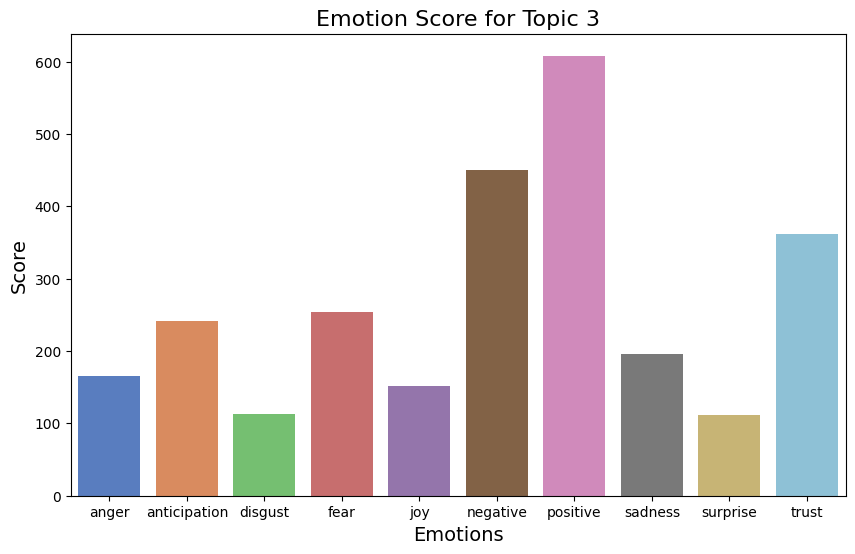

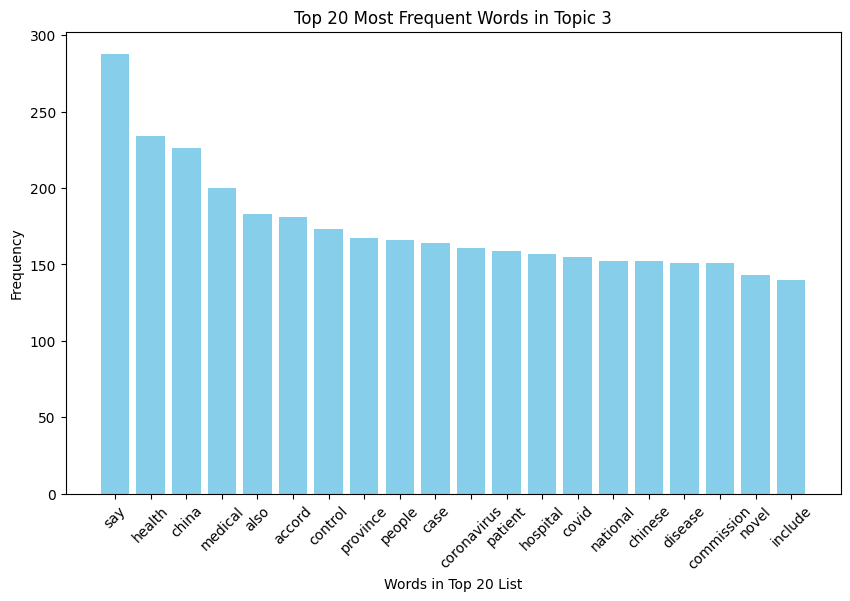

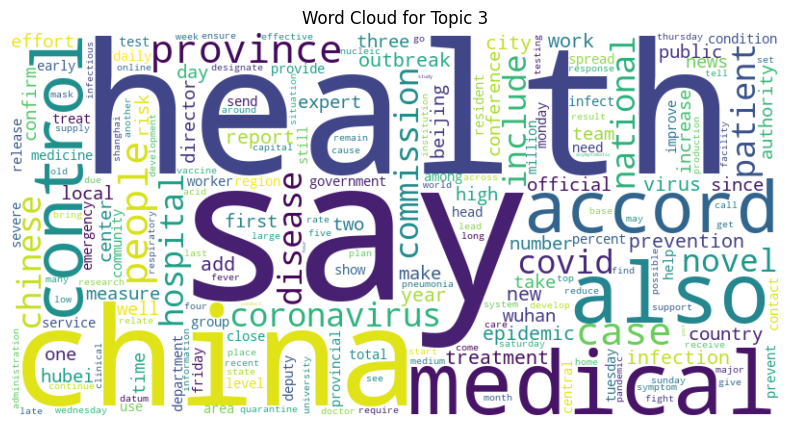



Topics for topic index 4:
(0, '0.021*"say" + 0.014*"city" + 0.011*"covid" + 0.010*"case" + 0.010*"health" + 0.009*"test" + 0.009*"shanghai" + 0.009*"people" + 0.008*"medical" + 0.008*"infection" + 0.007*"resident" + 0.007*"report" + 0.007*"control" + 0.007*"hospital" + 0.006*"nucleic"')
(1, '0.019*"say" + 0.012*"case" + 0.009*"covid" + 0.008*"people" + 0.008*"patient" + 0.008*"province" + 0.007*"medical" + 0.007*"china" + 0.006*"health" + 0.006*"report" + 0.006*"accord" + 0.006*"confirm" + 0.006*"control" + 0.006*"also" + 0.005*"year"')
(2, '0.026*"say" + 0.013*"china" + 0.013*"covid" + 0.010*"vaccine" + 0.009*"health" + 0.008*"people" + 0.006*"country" + 0.006*"outbreak" + 0.006*"chinese" + 0.006*"also" + 0.006*"vaccination" + 0.006*"patient" + 0.006*"hospital" + 0.005*"disease" + 0.005*"virus"')
(3, '0.017*"say" + 0.010*"virus" + 0.009*"people" + 0.008*"case" + 0.007*"china" + 0.007*"city" + 0.007*"outbreak" + 0.006*"covid" + 0.006*"work" + 0.005*"control" + 0.005*"government" + 0.

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_53220/1740465052.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


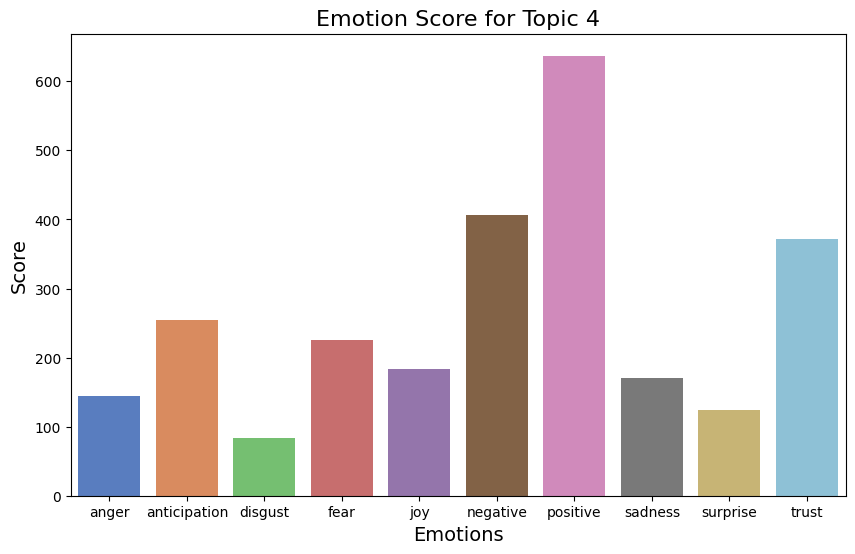

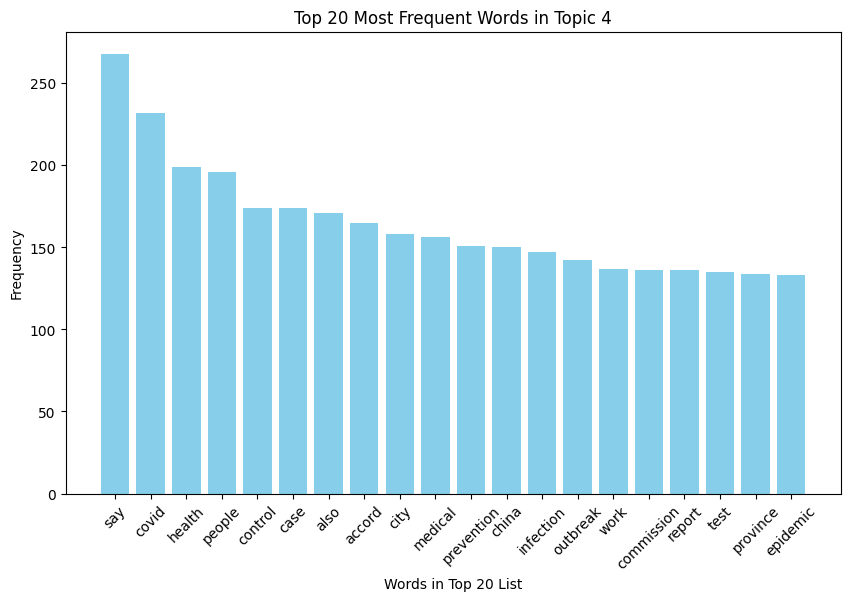

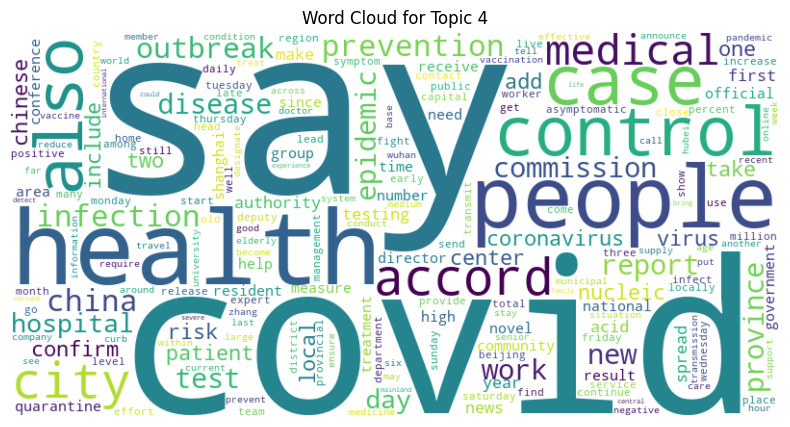



Topics for topic index 5:
(0, '0.019*"mask" + 0.017*"say" + 0.012*"china" + 0.011*"medical" + 0.010*"tcm" + 0.009*"face" + 0.009*"covid" + 0.008*"country" + 0.007*"chinese" + 0.006*"health" + 0.006*"people" + 0.006*"vaccine" + 0.005*"disease" + 0.005*"also" + 0.005*"prevention"')
(1, '0.033*"tcm" + 0.030*"say" + 0.017*"medicine" + 0.017*"patient" + 0.015*"chinese" + 0.014*"treatment" + 0.011*"covid" + 0.011*"hospital" + 0.010*"traditional" + 0.006*"zhang" + 0.006*"disease" + 0.006*"china" + 0.005*"use" + 0.005*"country" + 0.005*"also"')
(2, '0.021*"say" + 0.018*"vaccine" + 0.012*"patient" + 0.012*"covid" + 0.009*"china" + 0.009*"trial" + 0.008*"hospital" + 0.008*"virus" + 0.007*"treatment" + 0.006*"chinese" + 0.006*"antibody" + 0.006*"also" + 0.006*"clinical" + 0.005*"use" + 0.005*"accord"')
(3, '0.019*"say" + 0.011*"china" + 0.010*"medical" + 0.008*"patient" + 0.008*"covid" + 0.007*"chinese" + 0.007*"hospital" + 0.006*"research" + 0.006*"disease" + 0.006*"virus" + 0.005*"expert" + 0

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_53220/1740465052.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


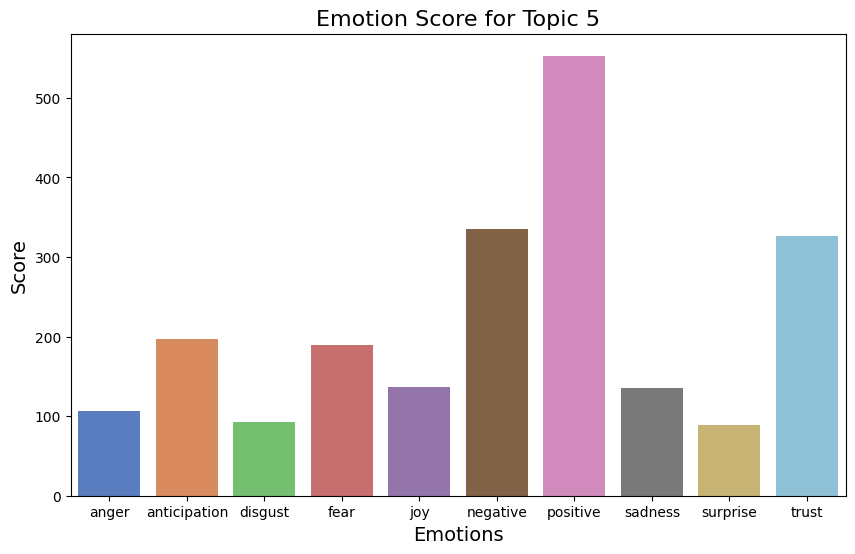

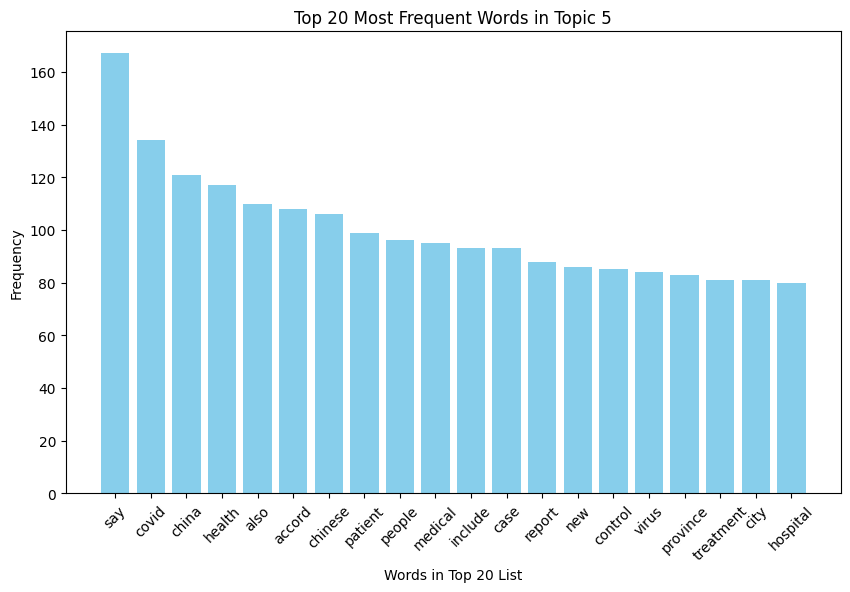

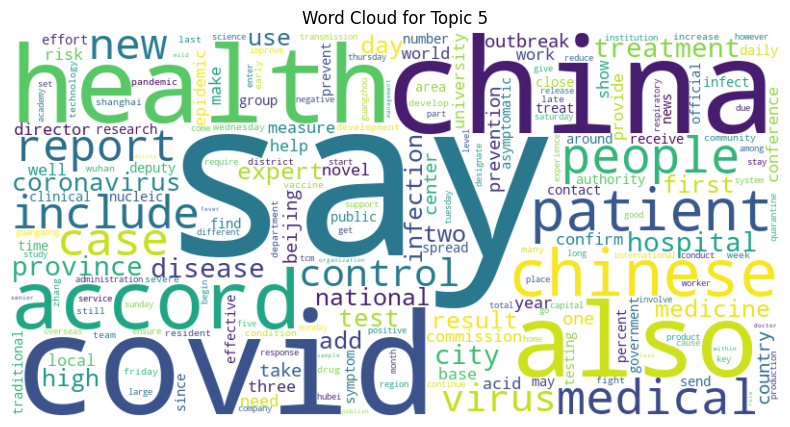



Topics for topic index 6:
(0, '0.026*"say" + 0.015*"control" + 0.013*"district" + 0.011*"case" + 0.011*"infection" + 0.010*"prevention" + 0.010*"beijing" + 0.010*"covid" + 0.009*"city" + 0.009*"report" + 0.008*"test" + 0.008*"epidemic" + 0.008*"risk" + 0.007*"area" + 0.007*"new"')
(1, '0.053*"case" + 0.028*"confirm" + 0.023*"report" + 0.020*"new" + 0.018*"commission" + 0.017*"patient" + 0.017*"say" + 0.016*"province" + 0.013*"health" + 0.012*"people" + 0.012*"covid" + 0.012*"two" + 0.011*"infection" + 0.010*"one" + 0.010*"accord"')
(2, '0.022*"case" + 0.021*"say" + 0.017*"city" + 0.013*"test" + 0.011*"health" + 0.009*"hospital" + 0.009*"asymptomatic" + 0.009*"covid" + 0.008*"report" + 0.008*"confirm" + 0.008*"patient" + 0.008*"nucleic" + 0.007*"acid" + 0.007*"virus" + 0.007*"people"')
(3, '0.067*"case" + 0.064*"report" + 0.046*"covid" + 0.042*"mainland" + 0.030*"total" + 0.028*"new" + 0.028*"commission" + 0.022*"discharge" + 0.022*"say" + 0.021*"death" + 0.020*"chinese" + 0.020*"impo

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_53220/1740465052.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


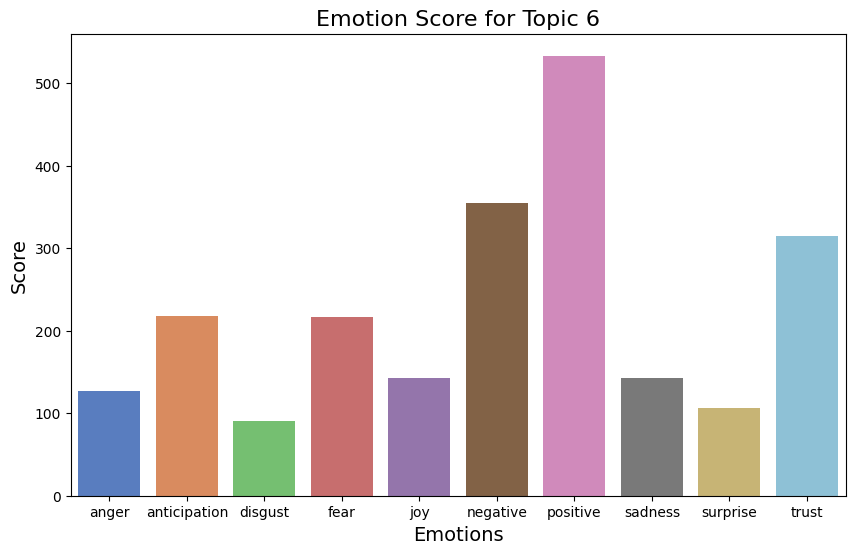

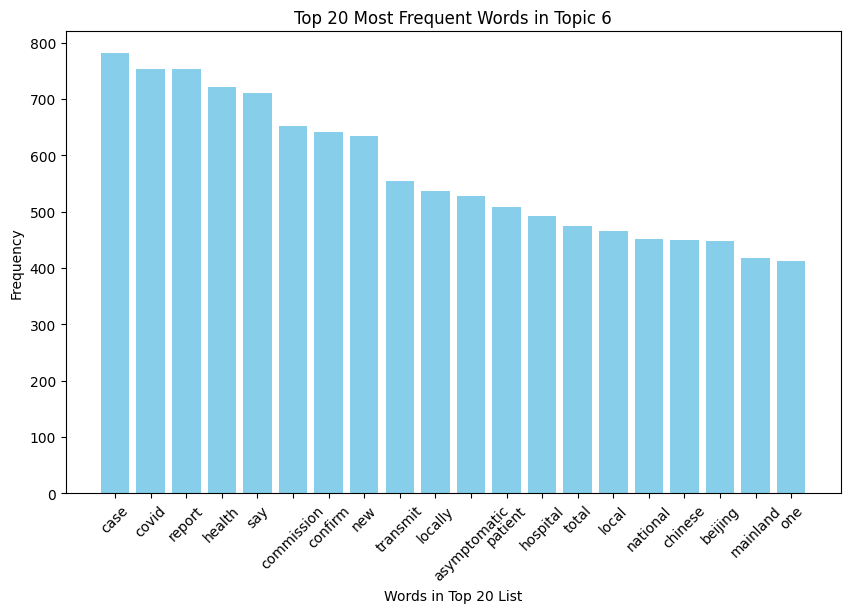

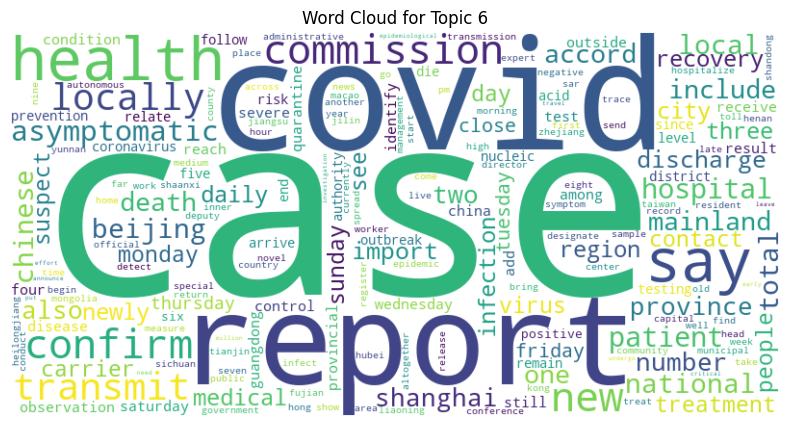



Topics for topic index 7:
(0, '0.021*"say" + 0.015*"case" + 0.011*"patient" + 0.010*"city" + 0.009*"control" + 0.009*"medical" + 0.009*"hospital" + 0.009*"china" + 0.008*"commission" + 0.008*"covid" + 0.008*"health" + 0.008*"disease" + 0.007*"province" + 0.007*"infection" + 0.006*"report"')
(1, '0.021*"say" + 0.009*"china" + 0.008*"hpv" + 0.008*"vaccine" + 0.007*"city" + 0.007*"cancer" + 0.006*"health" + 0.006*"government" + 0.006*"medical" + 0.006*"new" + 0.006*"vaccination" + 0.006*"cervical" + 0.005*"local" + 0.005*"year" + 0.005*"province"')
(2, '0.021*"say" + 0.011*"patient" + 0.011*"tcm" + 0.010*"covid" + 0.010*"medicine" + 0.008*"medical" + 0.007*"chinese" + 0.007*"people" + 0.007*"drug" + 0.006*"year" + 0.006*"china" + 0.005*"hospital" + 0.005*"country" + 0.005*"treatment" + 0.005*"health"')
(3, '0.046*"vaccine" + 0.022*"say" + 0.021*"china" + 0.016*"covid" + 0.015*"trial" + 0.010*"country" + 0.009*"clinical" + 0.008*"chinese" + 0.008*"use" + 0.007*"develop" + 0.006*"phase" +

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_53220/1740465052.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


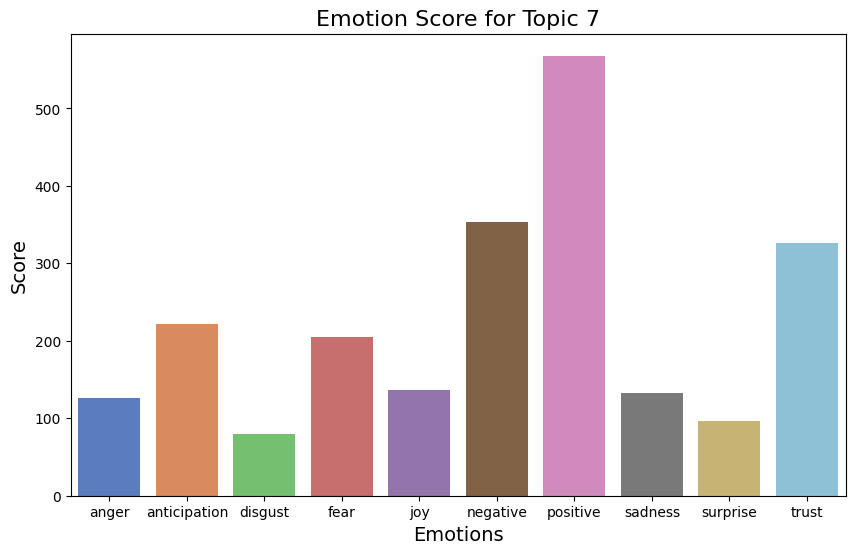

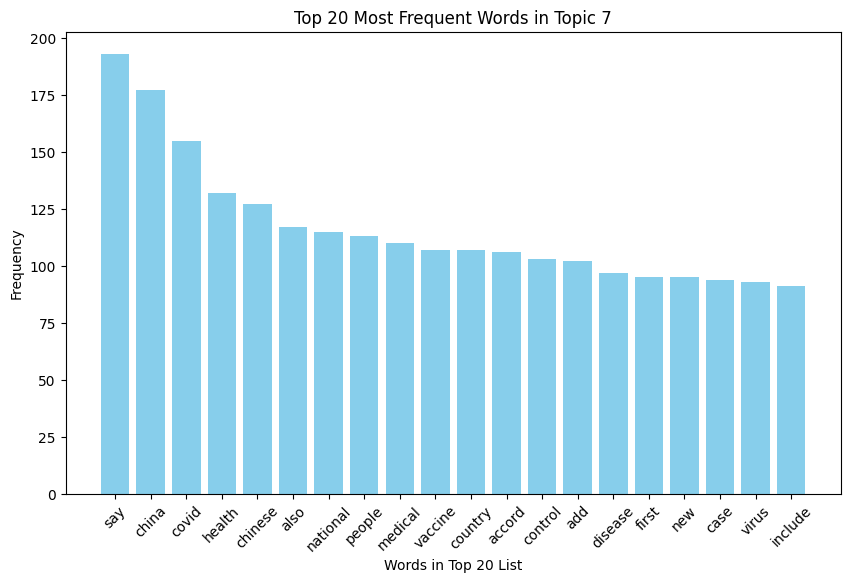

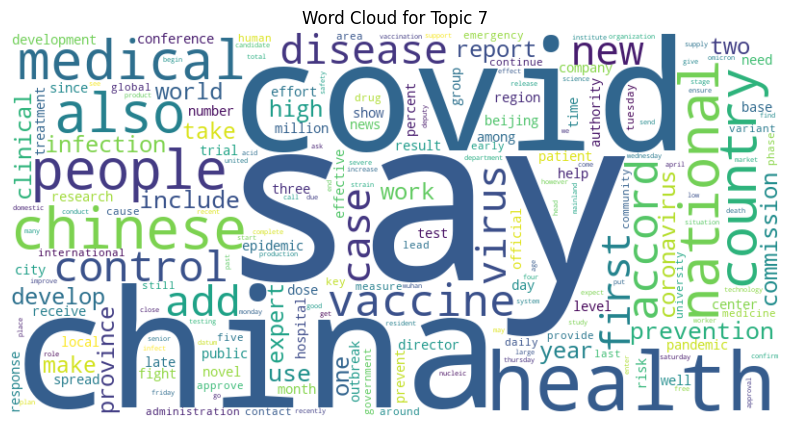



Topics for topic index 8:
(0, '0.028*"say" + 0.019*"vaccine" + 0.011*"china" + 0.010*"covid" + 0.009*"disease" + 0.008*"vaccination" + 0.008*"patient" + 0.008*"health" + 0.007*"people" + 0.007*"medical" + 0.006*"hospital" + 0.006*"chinese" + 0.005*"case" + 0.005*"also" + 0.005*"percent"')
(1, '0.022*"say" + 0.013*"city" + 0.012*"test" + 0.011*"case" + 0.010*"covid" + 0.010*"testing" + 0.009*"nucleic" + 0.009*"acid" + 0.009*"medical" + 0.008*"hospital" + 0.008*"control" + 0.008*"health" + 0.007*"local" + 0.007*"beijing" + 0.006*"people"')
(2, '0.023*"say" + 0.011*"patient" + 0.010*"coronavirus" + 0.009*"medical" + 0.009*"people" + 0.008*"virus" + 0.008*"novel" + 0.008*"wuhan" + 0.007*"covid" + 0.006*"health" + 0.006*"also" + 0.006*"epidemic" + 0.006*"control" + 0.005*"number" + 0.005*"disease"')
(3, '0.021*"hospital" + 0.018*"covid" + 0.018*"say" + 0.016*"patient" + 0.010*"case" + 0.007*"new" + 0.007*"infection" + 0.007*"health" + 0.007*"outbreak" + 0.007*"medical" + 0.006*"people" + 

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_53220/1740465052.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


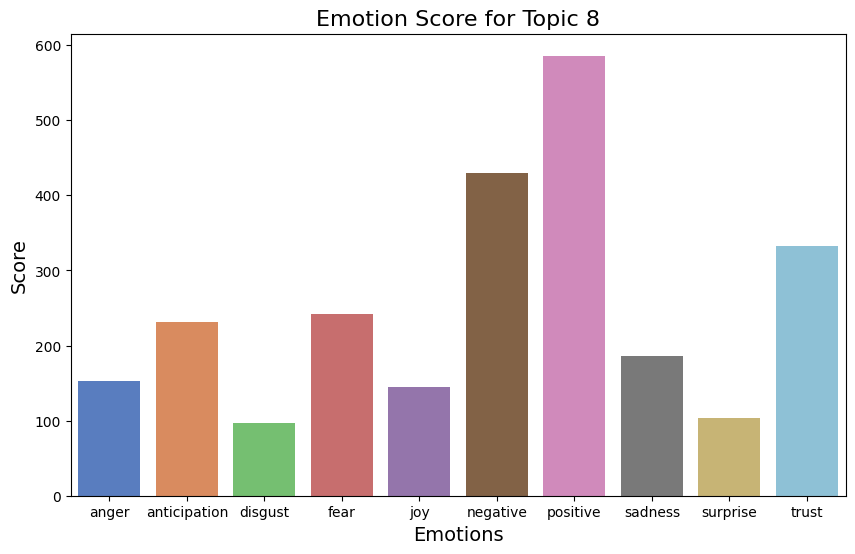

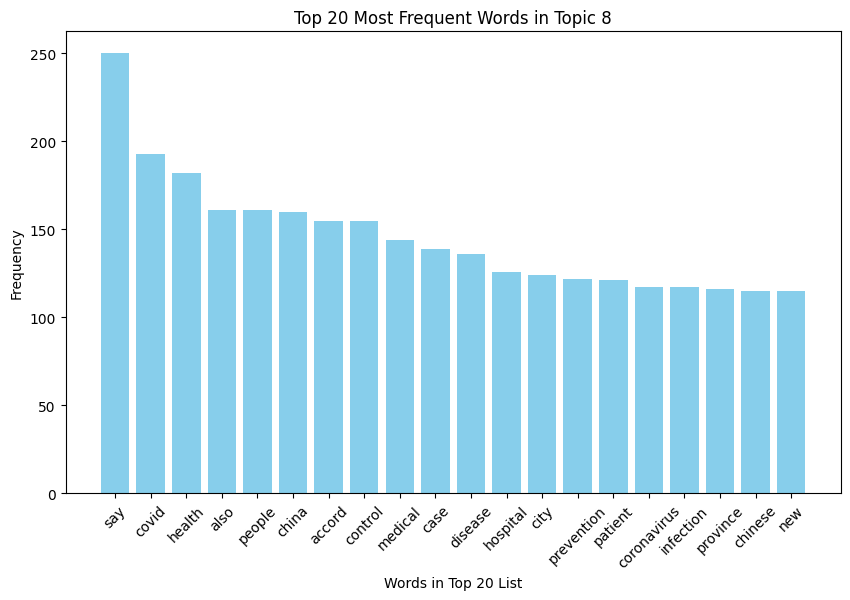

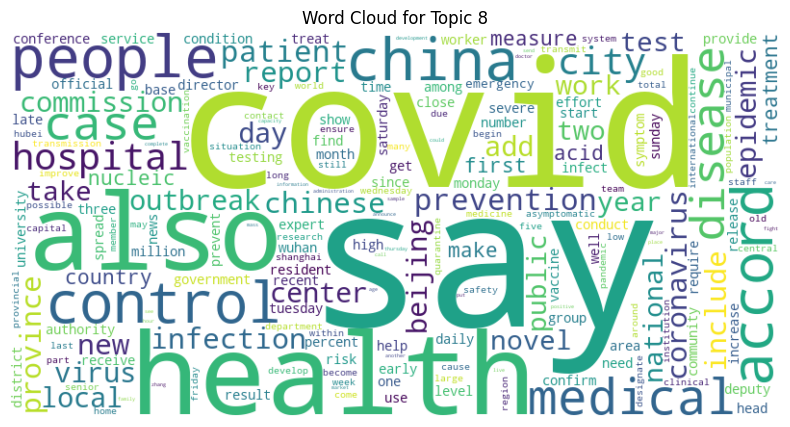



Topics for topic index 9:
(0, '0.025*"case" + 0.020*"say" + 0.017*"city" + 0.014*"report" + 0.014*"confirm" + 0.012*"covid" + 0.011*"health" + 0.010*"control" + 0.010*"new" + 0.009*"province" + 0.008*"prevention" + 0.007*"asymptomatic" + 0.007*"people" + 0.007*"commission" + 0.007*"patient"')
(1, '0.017*"say" + 0.015*"city" + 0.011*"test" + 0.010*"control" + 0.009*"infection" + 0.008*"nucleic" + 0.008*"resident" + 0.008*"acid" + 0.008*"people" + 0.008*"covid" + 0.007*"province" + 0.007*"take" + 0.007*"case" + 0.007*"day" + 0.006*"testing"')
(2, '0.030*"say" + 0.021*"china" + 0.011*"control" + 0.010*"covid" + 0.010*"health" + 0.008*"outbreak" + 0.008*"country" + 0.008*"people" + 0.007*"commission" + 0.007*"chinese" + 0.007*"epidemic" + 0.007*"virus" + 0.007*"measure" + 0.006*"disease" + 0.006*"case"')
(3, '0.023*"say" + 0.013*"vaccine" + 0.012*"hong" + 0.012*"kong" + 0.011*"vaccination" + 0.010*"covid" + 0.010*"medical" + 0.006*"health" + 0.006*"china" + 0.006*"percent" + 0.006*"peopl

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_53220/1740465052.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


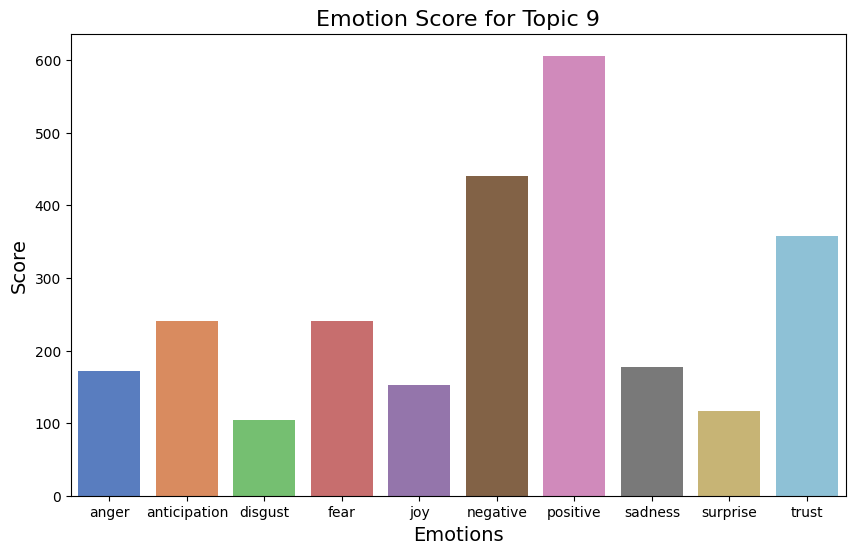

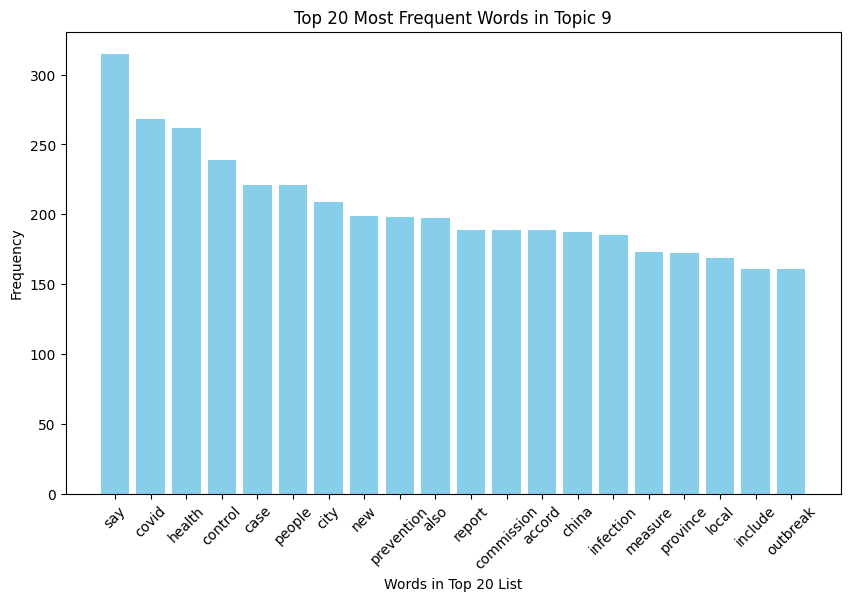

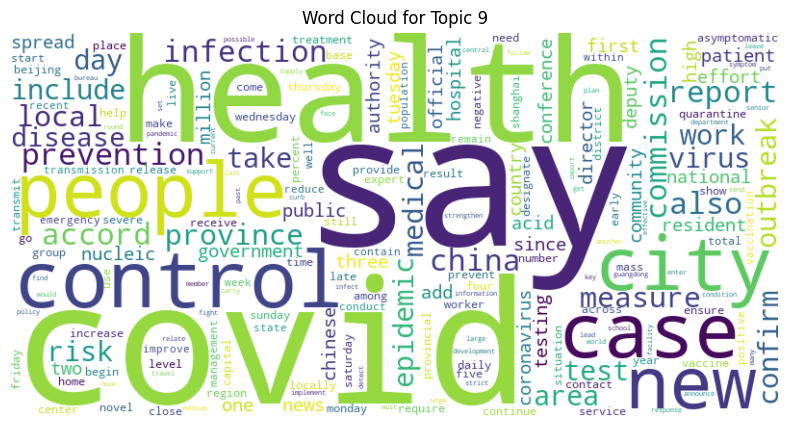



Topics for topic index 10:
(0, '0.018*"say" + 0.009*"patient" + 0.009*"hospital" + 0.008*"medical" + 0.008*"virus" + 0.007*"china" + 0.007*"coronavirus" + 0.007*"covid" + 0.006*"also" + 0.006*"research" + 0.006*"people" + 0.006*"novel" + 0.005*"infection" + 0.005*"wuhan" + 0.005*"case"')
(1, '0.027*"say" + 0.014*"covid" + 0.013*"control" + 0.013*"case" + 0.011*"health" + 0.008*"infection" + 0.008*"china" + 0.008*"prevention" + 0.008*"hospital" + 0.008*"people" + 0.007*"city" + 0.007*"virus" + 0.007*"report" + 0.007*"new" + 0.006*"epidemic"')
(2, '0.024*"say" + 0.012*"china" + 0.010*"hospital" + 0.009*"patient" + 0.008*"people" + 0.007*"health" + 0.007*"medical" + 0.007*"province" + 0.007*"chinese" + 0.006*"covid" + 0.006*"vaccine" + 0.005*"country" + 0.005*"also" + 0.005*"disease" + 0.005*"case"')
(3, '0.013*"say" + 0.011*"control" + 0.008*"people" + 0.008*"vaccination" + 0.008*"disease" + 0.007*"vaccine" + 0.007*"virus" + 0.007*"risk" + 0.006*"day" + 0.006*"health" + 0.006*"new" + 0

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_53220/1740465052.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


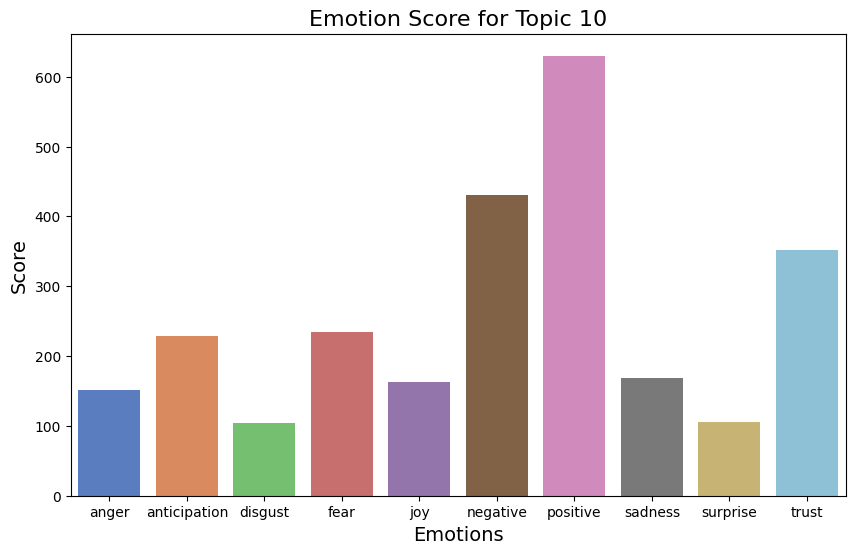

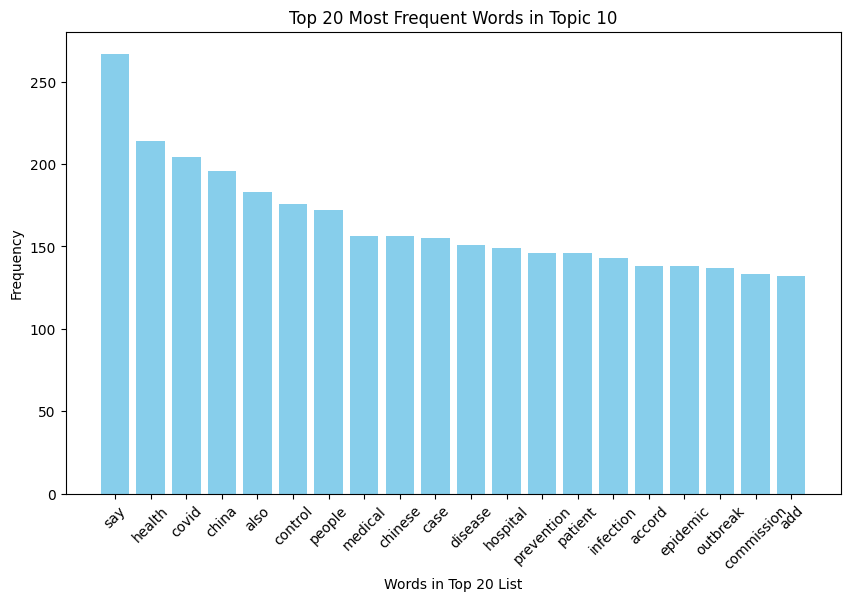

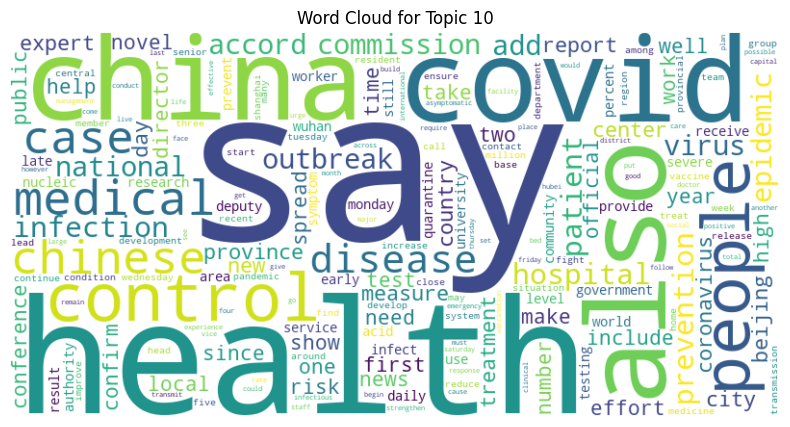

In [22]:
indices=[1,2,3,4,5,6,7,8,9,10]
selected_topics=[chn_topic[i] for i in indices]

# Initialize the pipeline with the selected topics
pipeline=TextAnalysisPipeline(topic_dataframes=selected_topics, n_topics=5)

# Display topics, emotional analysis and word frequency for each selected topic
for i, topic_idx in enumerate(indices):
    pipeline.display_topics(topic_idx=i, num_words=15)
    emotion_scores=pipeline.emotional_analysis(topic_idx=i)
    freq_df=pipeline.word_frequency_analysis(topic_idx=i)
    pipeline.generate_wordcloud(topic_idx=i)
    print("\n")


In [ ]:
import pandas as pd
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora
from collections import defaultdict

class TextAnalysisPipeline:
    def __init__(self, topic_data, n_topics=5, nrc_lexicon_file='NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'):
        self.topic_data = topic_data
        self.n_topics = n_topics
        
        # Load and prepare the NRC Lexicon
        self.nrc_lexicon = pd.read_csv(nrc_lexicon_file, names=["word", "emotion", "association"], sep="\t")
        self.emotion_dict = defaultdict(lambda: defaultdict(int))
        for i, row in self.nrc_lexicon.iterrows():
            self.emotion_dict[row['word']][row['emotion']] = int(row['association'])

        # Prepare topic modeling components
        self.topic_dict = corpora.Dictionary(self.topic_data['Tokens'])
        self.topic_corpus = [self.topic_dict.doc2bow(text) for text in self.topic_data['Tokens']]
        self.topic_lda = gensim.models.ldamodel.LdaModel(self.topic_corpus, 
                                                         num_topics=self.n_topics, 
                                                         id2word=self.topic_dict,
                                                         random_state=100,
                                                         passes=10,
                                                         alpha=0.1, 
                                                         eta=0.1)

    def display_topics(self, num_words=10):
        topics=self.topic_lda.print_topics(num_words=num_words)
        for topic in topics:
            print(topic)

    def emotional_analysis(self):
        topic_words = [self.topic_dict[id] for id in self.topic_dict.keys()]
        emotion_scores = defaultdict(int)
        
        for word in topic_words:
            for emotion in self.emotion_dict[word]:
                emotion_scores[emotion] += self.emotion_dict[word][emotion]

        # Display emotion scores as a bar plot
        emotion_df = pd.DataFrame(list(emotion_scores.items()), columns=['Emotions', 'Score'])
        plt.figure(figsize=(10,6))
        sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")
        plt.title('The overview of Emotion Score ', fontsize=16)
        plt.xlabel('Emotions', fontsize=14)
        plt.ylabel('Score', fontsize=14)
        plt.show()

        return emotion_scores


(0, '0.026*"say" + 0.023*"vaccine" + 0.013*"china" + 0.010*"covid" + 0.009*"disease" + 0.008*"chinese" + 0.007*"health" + 0.006*"patient" + 0.006*"use" + 0.006*"research"')
(1, '0.036*"china" + 0.032*"covid" + 0.024*"case" + 0.021*"say" + 0.017*"new" + 0.015*"chinese" + 0.015*"report" + 0.015*"virus" + 0.012*"coronavirus" + 0.010*"health"')
(2, '0.021*"say" + 0.015*"medical" + 0.012*"hospital" + 0.008*"wuhan" + 0.008*"people" + 0.008*"also" + 0.007*"health" + 0.007*"china" + 0.006*"work" + 0.006*"patient"')
(3, '0.062*"case" + 0.045*"report" + 0.031*"covid" + 0.029*"patient" + 0.025*"commission" + 0.024*"mainland" + 0.023*"hospital" + 0.023*"confirm" + 0.022*"new" + 0.020*"say"')
(4, '0.022*"say" + 0.019*"city" + 0.017*"case" + 0.013*"test" + 0.012*"control" + 0.010*"covid" + 0.009*"infection" + 0.009*"report" + 0.009*"health" + 0.009*"district"')


/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_42090/2808765858.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotions', y='Score', data=emotion_df, palette="muted")


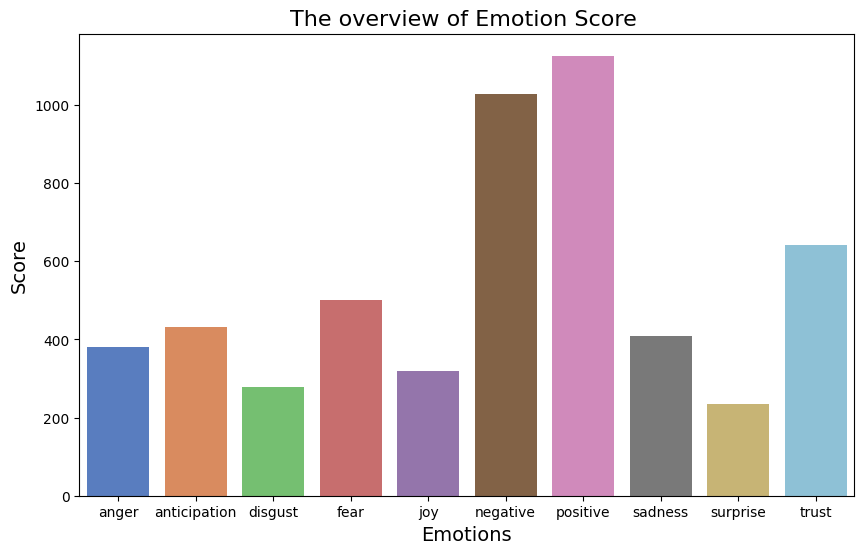

In [95]:
# Select the specific dataframe
pipeline = TextAnalysisPipeline(topic_data=chn, n_topics=5)
pipeline.display_topics(num_words=10)
emotion_scores = pipeline.emotional_analysis()

In [112]:
#change over year
chn['emotion_scores_total']=chn['Tokens'].apply(calculate_emotion_scores)

yearly_emotions_total=defaultdict(lambda: defaultdict(int))

for index, row in chn.iterrows():
    year=row['Year']
    emotions_total=row['emotion_scores_total']
    for emotion, score in emotions_total.items():
        yearly_emotions_total[year][emotion] += score

yearly_emotions_df_total=pd.DataFrame(yearly_emotions_total).T.reset_index().rename(columns={'index': 'Year'})
yearly_emotions_df_total=yearly_emotions_df_total.melt(id_vars=['Year'], var_name='Emotion', value_name='Score')

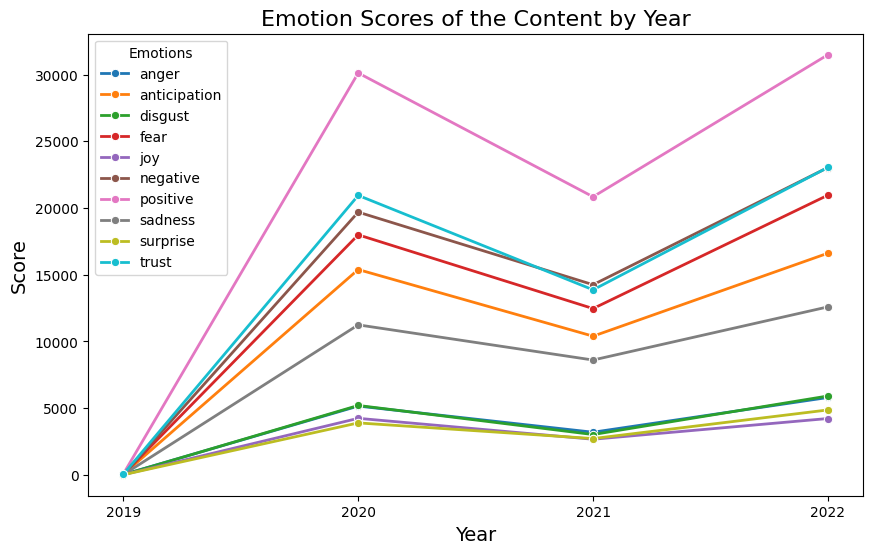

In [114]:
# lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Score', hue='Emotion', data=yearly_emotions_df_total, marker='o', linewidth=2)
plt.xticks(yearly_emotions_df_total['Year'].unique())
plt.title('Emotion Scores of the Content by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Emotions')
plt.show()

In [96]:
# words frequency analysis
chn_total_dict=corpora.Dictionary(chn['Tokens'])
chn_total_corpus=[chn_total_dict.doc2bow(text) for text in chn['Tokens']]
word_freq1=chn_total_dict.dfs
freq_chn_total=[(chn_total_dict[id], freq) for id, freq in word_freq1.items()]
freq_chn=pd.DataFrame(freq_chn_total, columns=['Word', 'Frequency'])
freq_chn_sort=freq_chn.sort_values(by='Frequency',ascending=False)
freq_chn_20=freq_chn_sort.head(20)
freq_chn_20

Word  Frequency
4           say       3054
12        covid       2702
56       health       2595
75         case       2271
469      report       2033
68   commission       1913
174         new       1864
0         china       1812
125      accord       1804
358        also       1793
55       people       1737
231     control       1723
61      chinese       1636
24      patient       1634
16      medical       1604
112    hospital       1602
470     confirm       1547
302    province       1543
15     national       1516
297        city       1510

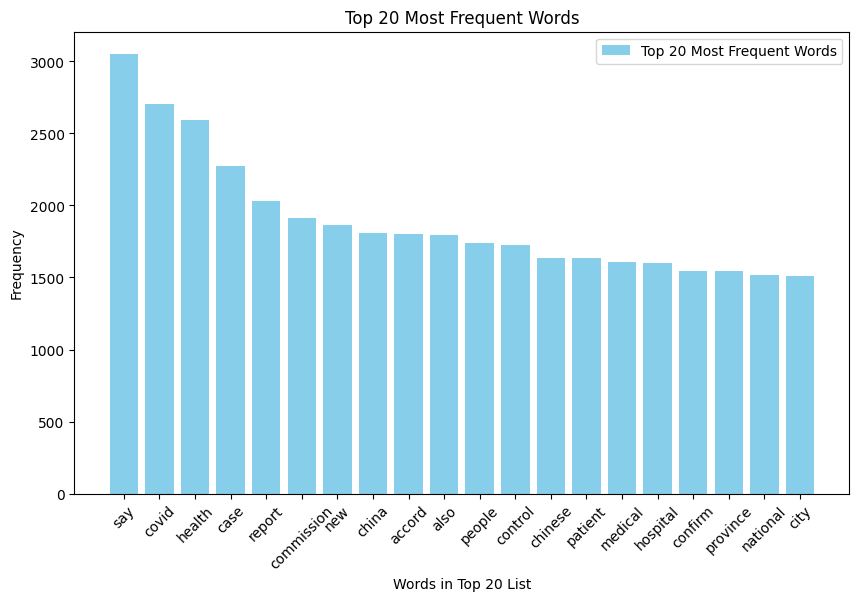

In [97]:
plt.figure(figsize=(10, 6))
plt.bar(freq_chn_20['Word'], freq_chn_20['Frequency'], color='skyblue')

# Adding labels and title
plt.xlabel("Words in Top 20 List")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words")
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.legend(["Top 20 Most Frequent Words"], loc='best')

# Display the plot
plt.show()

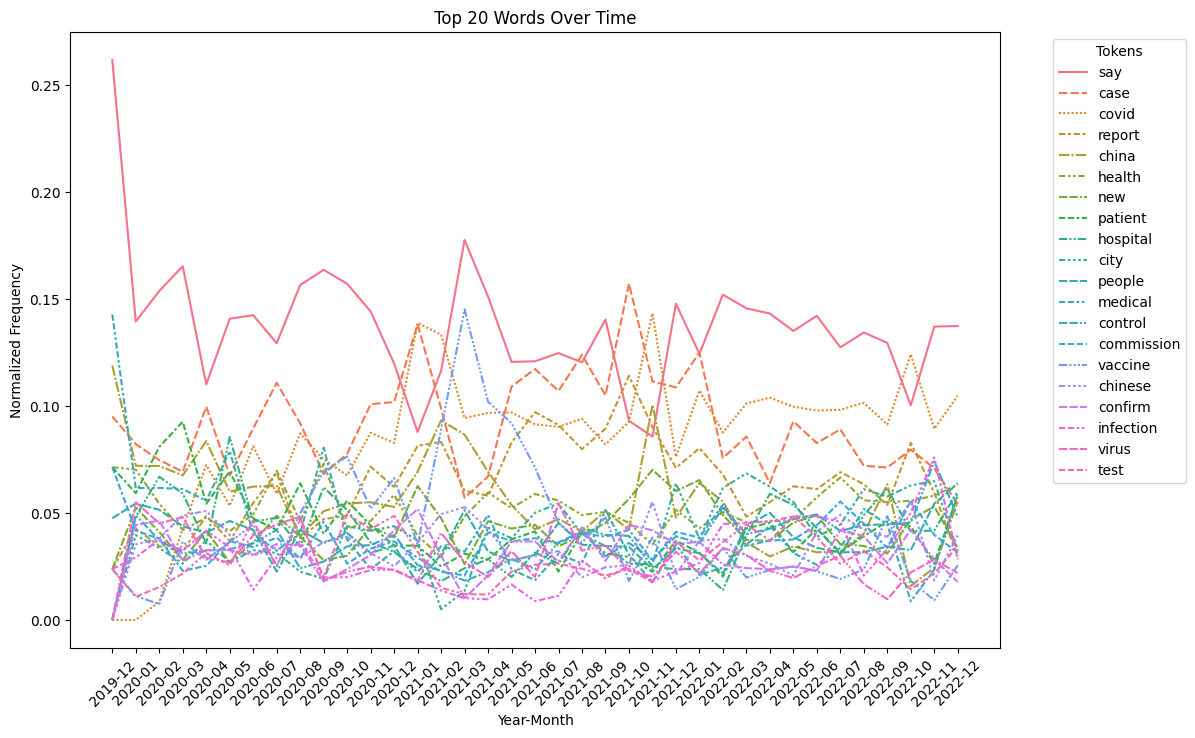

In [99]:
chn_exploded=chn.explode('Tokens')
token_counts=chn_exploded.groupby(['Yearmonth', 'Tokens']).size().reset_index(name='count')
token_pivot=token_counts.pivot(index='Yearmonth', columns='Tokens', values='count').fillna(0)
top_tokens=token_pivot.sum().sort_values(ascending=False).head(20).index
token_pivot_top=token_pivot[top_tokens]
token_pivot_top_normalized=token_pivot_top.div(token_pivot_top.sum(axis=1), axis=0)

# Plotting the top 20 tokens over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=token_pivot_top_normalized)
plt.title('Top 20 Words Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Normalized Frequency')
plt.legend(title='Tokens', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [100]:
from wordcloud import WordCloud

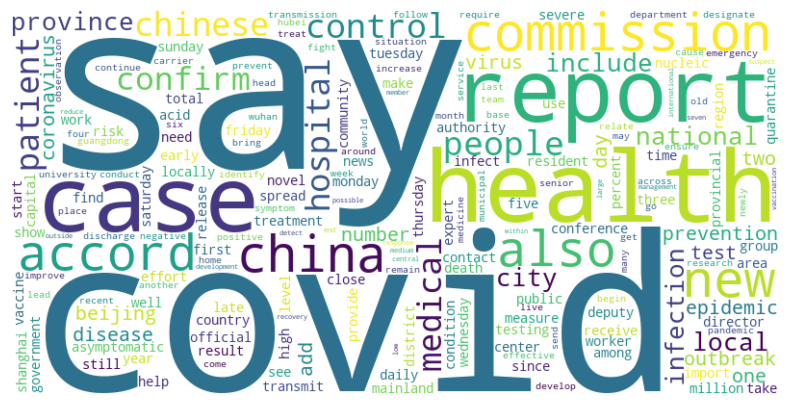

In [101]:
freq_chn_dict=pd.Series(freq_chn.Frequency.values, index=freq_chn.Word).to_dict()
# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(freq_chn_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()